In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy.stats import rankdata

In [32]:
df = pd.read_csv("/mnt/c/Users/donna/Downloads/Thesis/tacje/coad_abs_cor_mat.csv", index_col=0)

In [35]:
# Reshape to long format
df_long = df.reset_index().melt(id_vars='index', var_name='Tissue', value_name='Correlation')
df_long = df_long[df_long['Tissue'] != 'index']  # remove accidental "index" tissue

# Ensure values are numeric
df_long['Correlation'] = pd.to_numeric(df_long['Correlation'], errors='coerce')

# Sort tissues by mean correlation (lowest mean = top)
mean_order = df_long.groupby('Tissue')['Correlation'].mean().sort_values(ascending=False).index.tolist()



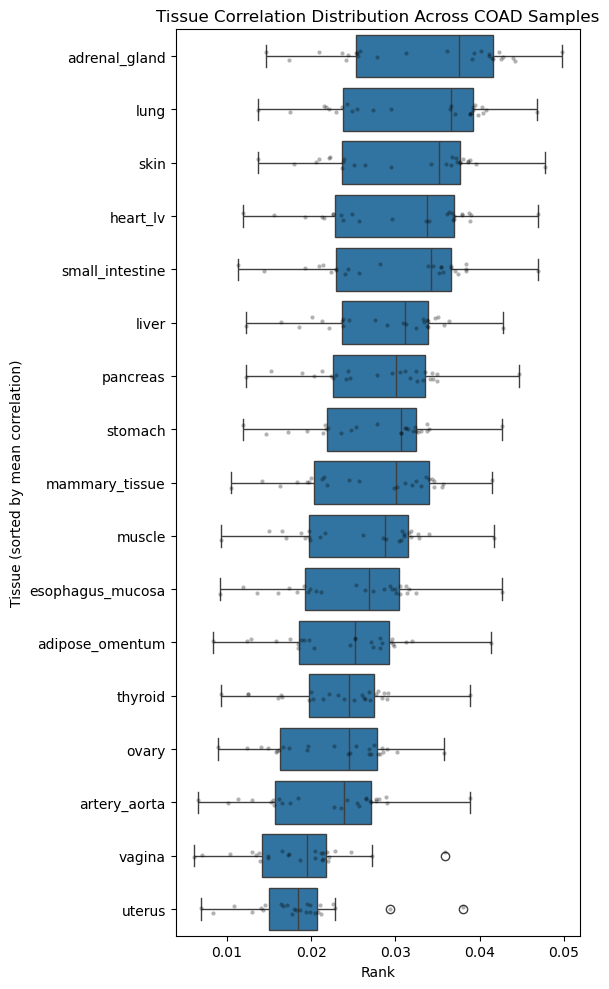

In [36]:
plt.figure(figsize=(6, 10))

# Plot vertical boxplots of rank per tissue (sorted by median rank)
sns.boxplot(y='Tissue', x='Correlation', data=df_long, order=mean_order)
sns.stripplot(y='Tissue', x='Correlation', data=df_long, order=mean_order,
              color='black', alpha=0.3, jitter=True, size=3)

# Formatting
plt.xlabel("Rank")
plt.ylabel("Tissue (sorted by mean correlation)")
plt.title("Tissue Correlation Distribution Across COAD Samples")
plt.tight_layout()
plt.show()
